In [5]:
import xlandsat as xls
import matplotlib.pyplot as plt

In [80]:
s

<xarray.Dataset> Size: 9MB
Dimensions:   (easting: 1168, northing: 634)
Coordinates:
  * easting   (easting) float64 9kB 1.15e+05 1.15e+05 ... 1.5e+05 1.5e+05
  * northing  (northing) float64 5kB 2.299e+06 2.299e+06 ... 2.318e+06 2.318e+06
Data variables:
    blue      (northing, easting) float16 1MB 0.08936 0.08923 ... 0.1106 0.1115
    green     (northing, easting) float16 1MB 0.04773 0.04688 ... 0.1062 0.1071
    red       (northing, easting) float16 1MB 0.02991 0.02942 ... 0.1136 0.1157
    nir       (northing, easting) float16 1MB 0.01794 0.0177 ... 0.2391 0.2335
    swir1     (northing, easting) float16 1MB 0.01172 0.01007 ... 0.2705 0.2715
    swir2     (northing, easting) float16 1MB 0.009644 0.008179 ... 0.1688
Attributes: (12/19)
    Conventions:                CF-1.8
    title:                      Landsat 9 scene from 2023-08-31 (path/row=63/46)
    digital_object_identifier:  https://doi.org/10.5066/P975CC9B
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC09_L1TP_063046_20230831_20230901_02_T1
    processing_level:           L1TP
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2023-08-31
    scene_center_time:          20:48:13.5629849Z
    wrs_path:                   63
    wrs_row:                    46
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

/home/leo/src/xlandsat/xlandsat/_io.py:627: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  line = line.split(" = ")[0] + f" = {scene.dims['northing']}"
/home/leo/src/xlandsat/xlandsat/_io.py:629: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  line = line.split(" = ")[0] + f" = {scene.dims['easting']}"


(113985.0, 123015.0, 2306985.0, 2317995.0)

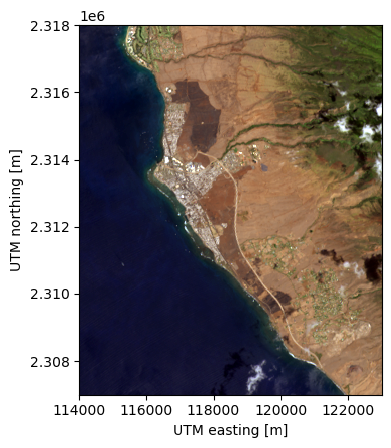

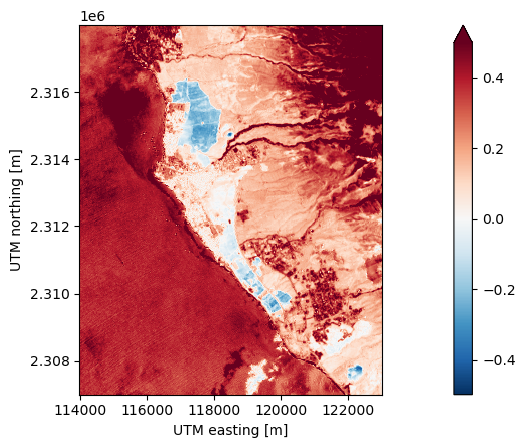

In [91]:
# region = [115e3, 150e3, 2299e3, 2318e3]
region = [114e3, 123e3, 2307e3, 2318e3]
s = xls.load_scene("../../Downloads/maui/LC09_L1TP_063046_20230831_20230901_02_T1.tar", region=region, bands="blue green red nir swir1 swir2".split())

xls.save_scene("data/LC09_L1TP_063046_20230831_20230901_02_T1-cropped.tar.gz", s)

# s = xls.interpolate_missing(s, method="neighbors")
r = xls.composite(s, rescale_to=(0, 0.3))
r = xls.adjust_l1_colors(r)
fig, ax = plt.subplots(1, 1)
ax.set_facecolor("m")
r.plot.imshow(ax=ax)
ax.set_aspect("equal")
ax.set_xlim(*region[:2])
ax.set_ylim(*region[2:])
plt.figure()
nbr1 = (s.nir - s.swir2)/(s.swir2 + s.nir)
nbr1.plot(vmin=-0.5, vmax=0.5, cmap="RdBu_r")
plt.axis("scaled")

/home/leo/src/xlandsat/xlandsat/_io.py:627: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  line = line.split(" = ")[0] + f" = {scene.dims['northing']}"
/home/leo/src/xlandsat/xlandsat/_io.py:629: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  line = line.split(" = ")[0] + f" = {scene.dims['easting']}"
/home/leo/src/xlandsat/xlandsat/_io.py:644: UserWarning: <_io.BytesIO object at 0x7f39ca1e0630> is a low contrast image
  skimage.io.imsave(


(113985.0, 123015.0, 2306985.0, 2317995.0)

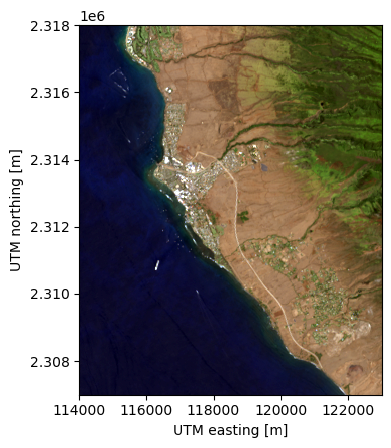

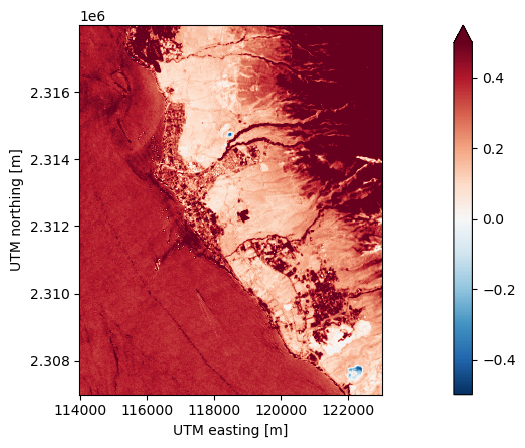

In [95]:
# region = [115e3, 150e3, 2299e3, 2318e3]
s = xls.load_scene("../../Downloads/maui/LC09_L1TP_063046_20230714_20230714_02_T1.tar", region=region)
xls.save_scene("data/LC09_L1TP_063046_20230714_20230714_02_T1-cropped.tar.gz", s)
# s = xls.interpolate_missing(s, method="neighbors")
r = xls.composite(s, rescale_to=(0, 0.3))
r = xls.adjust_l1_colors(r)
fig, ax = plt.subplots(1, 1)
ax.set_facecolor("m")
r.plot.imshow(ax=ax)
ax.set_aspect("equal")
ax.set_xlim(*region[:2])
ax.set_ylim(*region[2:])
plt.figure()
nbr0 = (s.nir - s.swir2)/(s.swir2 + s.nir)
nbr0.plot(vmin=-0.5, vmax=0.5, cmap="RdBu_r")
plt.axis("scaled")

(113985.0, 123015.0, 2306985.0, 2317995.0)

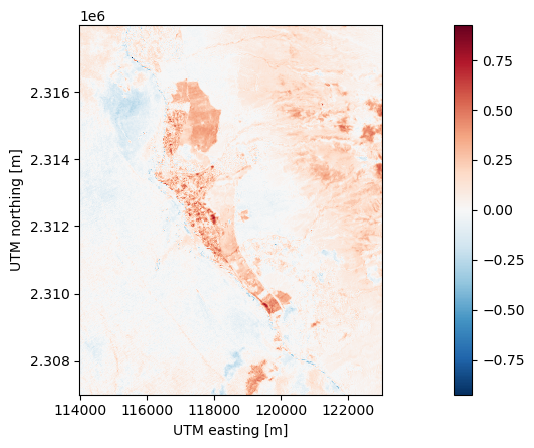

In [94]:
plt.figure()
(nbr0 - nbr1).plot(cmap="RdBu_r")
plt.axis("scaled")